In [1]:
import pandas as pd
import matplotlib as plt
import matplotlib.pyplot as plt
import numpy as np
from sqlite3 import connect
from fun import *

All items are covered.


In [2]:
# df = cleaning(df)
# assign_console_mfg(df)

In [3]:
df = pd.read_csv('vgchartz-2024.csv')

The data covers video games sales from 1971 to current. Some of the data is missing or not available so we are taking the final numbers with a grain of salt. 
<br>
data source: https://www.kaggle.com/datasets/asaniczka/video-game-sales-2024
<br>
contact me here: https://github.com/dmorton714/v_game.git

| Functions | Description | How its used |
| -- | -- | -- |
| check_missing_items | identify missing items in a DataFrame column compared to a list | Runs automatically |
| assign_console_mfg | assigns categories to rows based on predefined console categories| Runs automatically  |
| check_missing_items <br> assign_console_mfg | Used together to checks for missing items, prints a message if any, <br> assigns 'console_mfg' values, and displays the DataFrame with the new column| Runs automatically |
| filter_and_group_by_year | generates DataFrames for years 1971 - 2023 | sales_xxxx  |
| single_graph | This plots a single console and looks at its game sales for a picked time line | single_graph((1990, 2024), 'N64') |
| stacked_graph  | This plots a several consoles and looks at its game sales for a picked time line  | stacked_graph((1980, 2024), 'PS3', 'PS4', 'PS2') |
| graph  |  This plots a several consoles and looks at its game sales for a picked time line | graph((1980, 2024), 'PS3', 'PS4', 'PS2') |
| graph_genre_quarterly | Graphs the quatrly sales by genre | graph_genre_quarterly((2015,2018), 'Shooter', 'Role-Playing', 'Action') |

## Sales by year per console

Called by `sales_xxxx` just select the year you are interested in seeing the data for

In [4]:
sales_2017

,release_date,console,total_sales
0,2017,2600,0.00
1,2017,3DS,12.48
2,2017,All,0.00
3,2017,Amig,0.00
4,2017,And,0.00
5,2017,Linux,0.00
6,2017,NS,15.84
7,2017,OR,0.00
8,2017,OSX,0.00
9,2017,PC,1.53


## Sales by year per genre

Called by `genre_xxxx` just select the year you are interested in seeing the data for

In [5]:
genre_2001

,release_date,genre,total_sales
0,2001,Action,33.45
1,2001,Action-Adventure,0.00
2,2001,Adventure,14.64
3,2001,Education,0.00
4,2001,Fighting,9.47
5,2001,Misc,12.25
6,2001,Party,0.00
7,2001,Platform,20.53
8,2001,Puzzle,8.20
9,2001,Racing,31.08


| MFG | Keys | 
| -- | -- | 
|nintendo | 3DS, DS, Wii, WiiU, NS, GB, NES, SNES, GBC, N64, GC |
| pc | Linux, OSX, PC, Arc, All |
| xbox | X360, XOne, Series |
| sony | PS, PS2, PS3, PS4, PS5, PSP, PSV, PSN | 
| mobile | iOS, And|
| sega | GG, MSD, MS, GEN, SCD |
| atari | 2600, 7800 |
| commodore | amig, C64 |
| other | Ouya, OR, ACPC, AST, ApII, PCE, ZXS, Lynx, NG, ZXS |

Single Console by year range

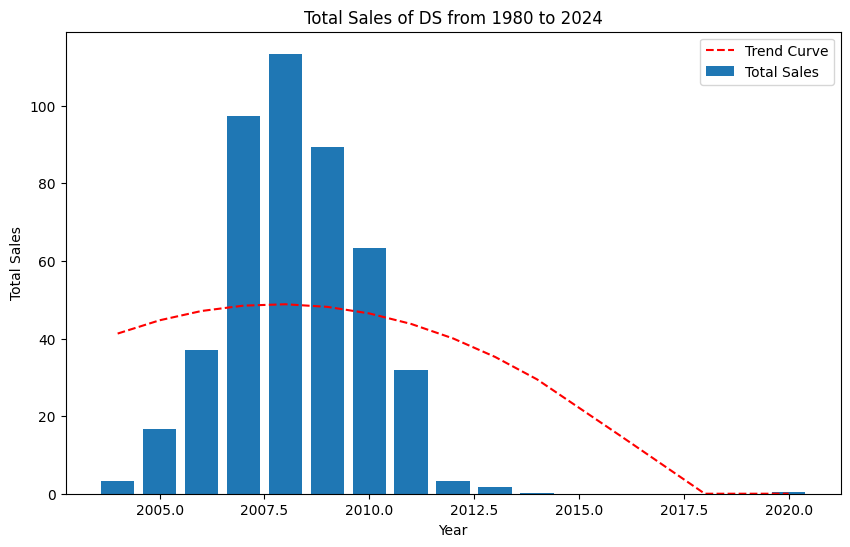

In [6]:
single_graph((1980, 2024), 'DS')

Multi Console by year range stacked bars 

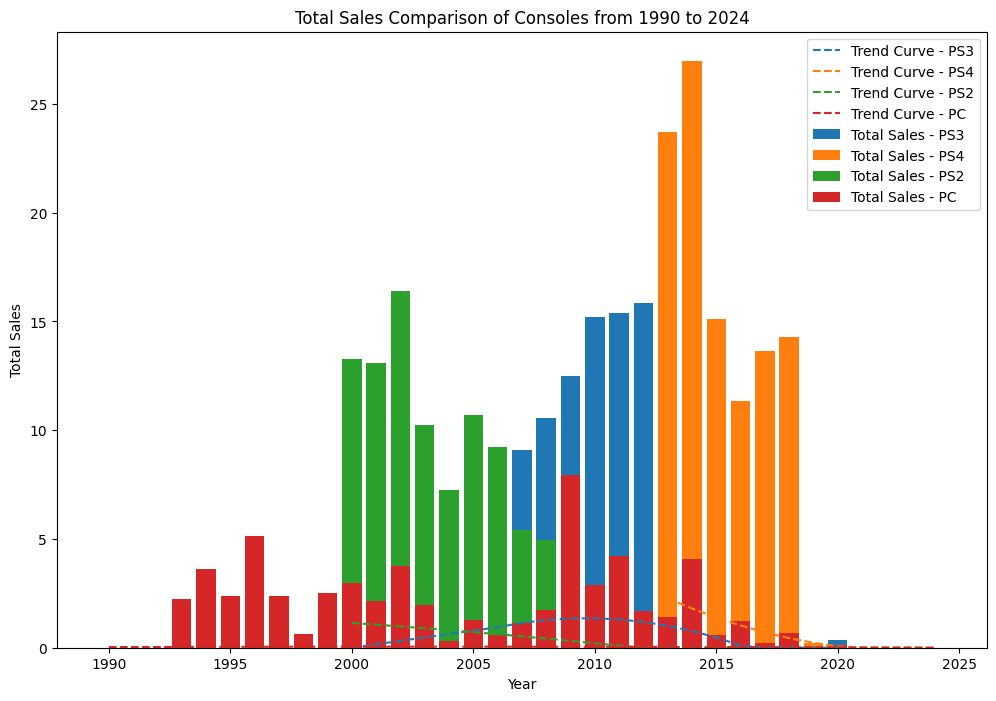

In [7]:
stacked_graph((1990, 2024), 'PS3', 'PS4', 'PS2', 'PC')

Multi Console by year range not stacked bars 

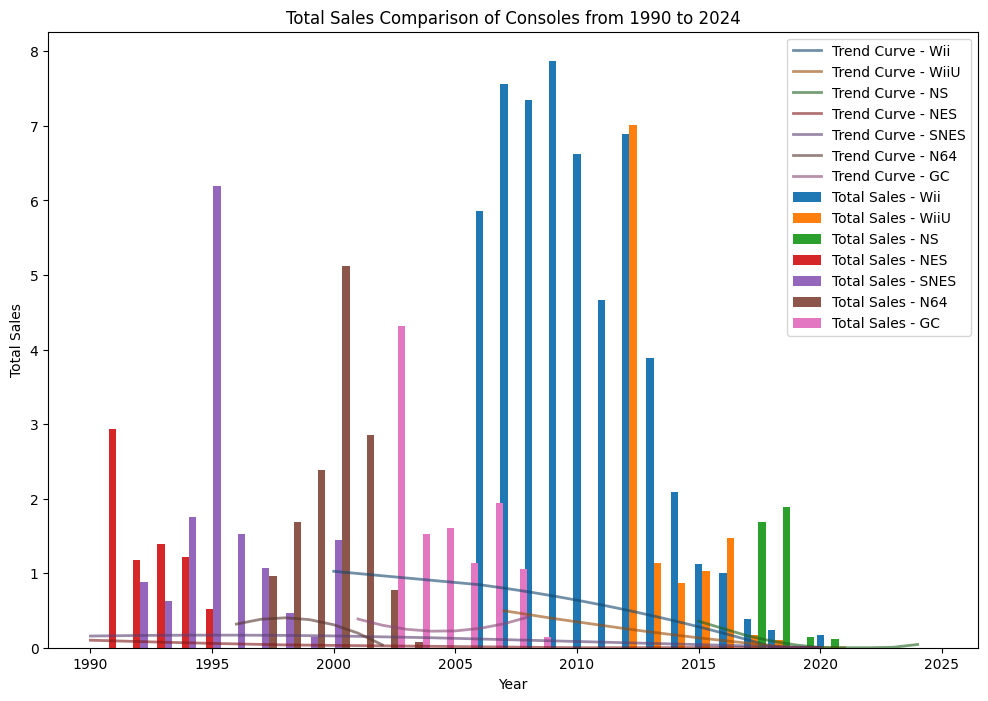

In [8]:
graph((1990, 2024),  'Wii', 'WiiU', 'NS', 'NES', 'SNES', 'N64', 'GC')

Genre Dict with game count

| Genre | Count |
|-------|-------|
| Misc | 8932 |
| Action | 7440 |
| Adventure | 5370 |
| Sports | 5341 |
| Role-Playing | 4929 |
| Shooter | 4760 |
| Platform | 3556 |
| Strategy | 3305 |
| Puzzle | 3139 |
| Racing | 3095 |
| Simulation | 2829 |
| Fighting | 2143 |
| Action-Adventure | 1190 |
| Visual Novel | 424 |
| Music | 259 |
| Party | 103 |
| MMO | 92 |
| Board Game | 22 |
| Education | 21 |
| Sandbox | 15 |

## Genre sales by year 

Multi genre by year range not stacked bars with trends

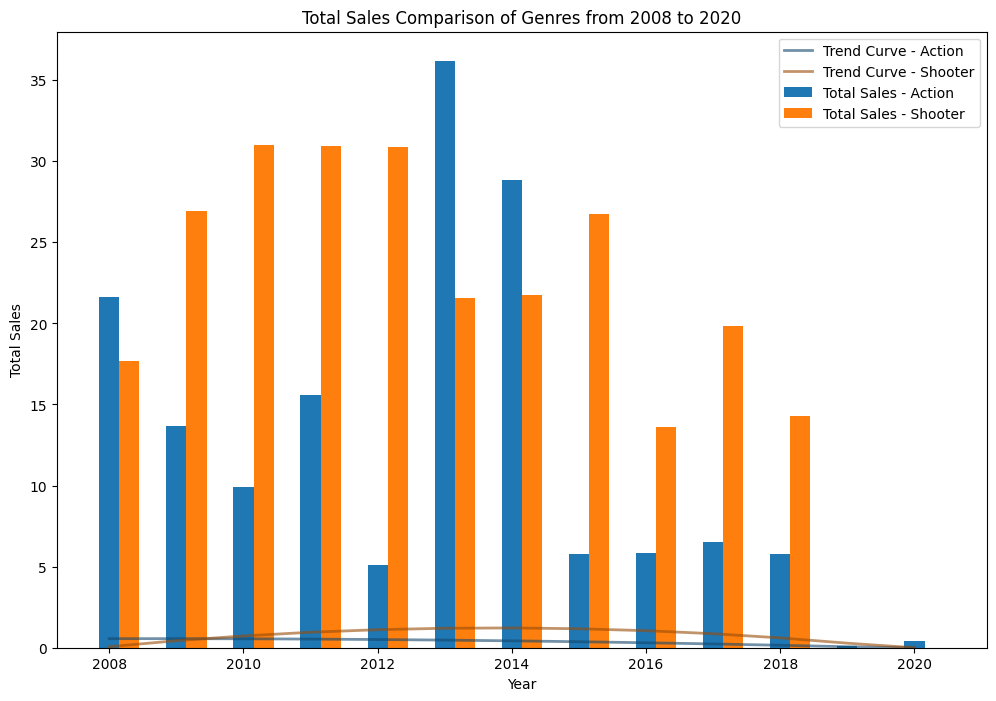

In [9]:
graph_genre((2008,2020), 'Action', 'Shooter')

### Top games all time per genre 

Use the genre dictionary to replace Action

In [10]:
top_genre('Action')

,title,total_sales
0,Grand Theft Auto V,20.32
1,Grand Theft Auto V,19.39
2,Grand Theft Auto: Vice City,16.15
3,Grand Theft Auto V,15.86
13,Grand Theft Auto III,13.10
16,Grand Theft Auto IV,11.09
19,Grand Theft Auto IV,10.57
28,Grand Theft Auto V,8.72
35,Grand Theft Auto: Liberty City Stories,7.72
46,Uncharted 2: Among Thieves,6.74


## Genre Sales by Quarterly

Multi Console by Quarter range not stacked bars 

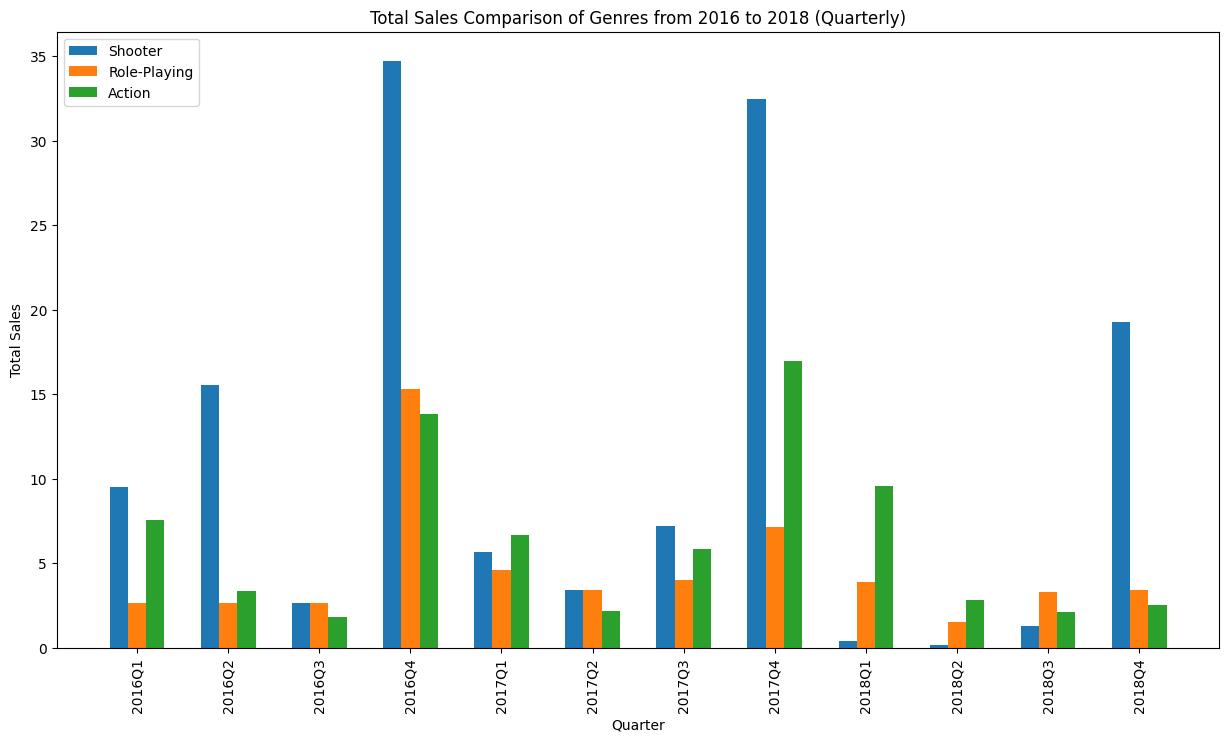

In [11]:
graph_genre_quarterly((2016,2018), 'Shooter', 'Role-Playing', 'Action')

# SQL Queries 
For SQL Queries use the following function `sql()` put you query in tripple quotes. 

In [12]:
sql("""
    SELECT
        title,
        genre,
        publisher,
        developer,
        AVG(critic_score) AS avg_critic_score,
        SUM(total_sales) AS total_sales,
        MIN(release_date) AS release_date
    FROM
        df
    GROUP BY
        title
    ORDER BY
        total_sales DESC
    LIMIT 10 
""")

,title,genre,publisher,developer,avg_critic_score,total_sales,release_date
0,Grand Theft Auto V,Action,Rockstar Games,Rockstar North,3.512500,64.29,2013-09-17 00:00:00
1,Call of Duty: Black Ops,Shooter,Activision,Treyarch,8.287500,30.99,2010-11-09 00:00:00
2,Call of Duty: Modern Warfare 3,Shooter,Activision,Infinity Ward,6.000000,30.71,2011-11-08 00:00:00
3,Call of Duty: Black Ops II,Shooter,Activision,Treyarch,6.700000,29.59,2012-11-13 00:00:00
4,Call of Duty: Ghosts,Shooter,Activision,Infinity Ward,6.714286,28.80,2013-11-05 00:00:00
5,Call of Duty: Black Ops 3,Shooter,Activision,Treyarch,1.620000,26.72,2015-11-06 00:00:00
6,Call of Duty: Modern Warfare 2,Shooter,Activision,Infinity Ward,4.666667,25.02,2009-11-10 00:00:00
7,Minecraft,Misc,Mojang,Mojang AB,3.138462,24.01,2010-05-10 00:00:00
8,Grand Theft Auto IV,Action,Rockstar Games,Rockstar North,5.840000,22.53,2008-04-29 00:00:00
9,Call of Duty: Advanced Warfare,Shooter,Activision,Sledgehammer Games,8.720000,21.78,2014-11-04 00:00:00
